In [ ]:
!pip install statsmodels>=0.9.0
!pip install yfinance --upgrade --no-cache-dir
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

import pandas_datareader as pdr
import datetime 
import math
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt


     |████████████████████████████████| 6.3 MB 38.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=0249b3319c9160957059d9fe5b6a08992f8d1d2b54f38014e0a4baa0f7a17c27
  Stored in directory: /tmp/pip-ephem-wheel-cache-6imzfej3/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/stock_price/EOD-AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,12/28/2017,171.00,171.850,170.480,171.08,16480187,41.006118,41.209949,40.881421,41.025302,65920748
1,12/27/2017,170.10,170.780,169.710,170.60,21498213,40.790296,40.953361,40.696773,40.910197,85992852
2,12/26/2017,170.80,171.470,169.679,170.57,33185536,40.958157,41.118825,40.689340,40.903003,132742144
3,12/22/2017,174.68,175.424,174.500,175.01,16349444,41.888589,42.067001,41.845424,41.967723,65397776
4,12/21/2017,174.17,176.020,174.100,175.01,20949896,41.766290,42.209923,41.749504,41.967723,83799584


In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,194.564537,196.114735,193.016676,194.613130,3.605114e+07,26.283677,26.493692,26.068855,26.289305,1.931334e+08
std,160.562848,161.812898,159.407381,160.647536,2.194473e+07,6.593449,6.619745,6.557756,6.595409,1.112891e+08
min,90.000000,90.700000,89.470000,90.280000,5.704900e+06,14.144639,14.515653,14.121273,14.212842,4.590369e+07
25%,108.042500,108.942500,106.972500,108.007500,2.120714e+07,22.099713,22.362631,21.879019,22.130410,1.133450e+08
50%,121.585000,122.504950,120.640000,121.755000,3.248325e+07,25.699500,25.972960,25.430346,25.707787,1.681963e+08
75%,156.905000,157.809625,155.744975,156.515000,4.673778e+07,29.235805,29.448022,29.041285,29.269451,2.394642e+08
max,649.900000,651.260000,644.470000,647.350000,1.895606e+08,41.991703,42.492889,41.931753,42.305844,1.065523e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1090 non-null   object 
 1   Open        1090 non-null   float64
 2   High        1090 non-null   float64
 3   Low         1090 non-null   float64
 4   Close       1090 non-null   float64
 5   Volume      1090 non-null   int64  
 6   Adj_Open    1090 non-null   float64
 7   Adj_High    1090 non-null   float64
 8   Adj_Low     1090 non-null   float64
 9   Adj_Close   1090 non-null   float64
 10  Adj_Volume  1090 non-null   int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 93.8+ KB


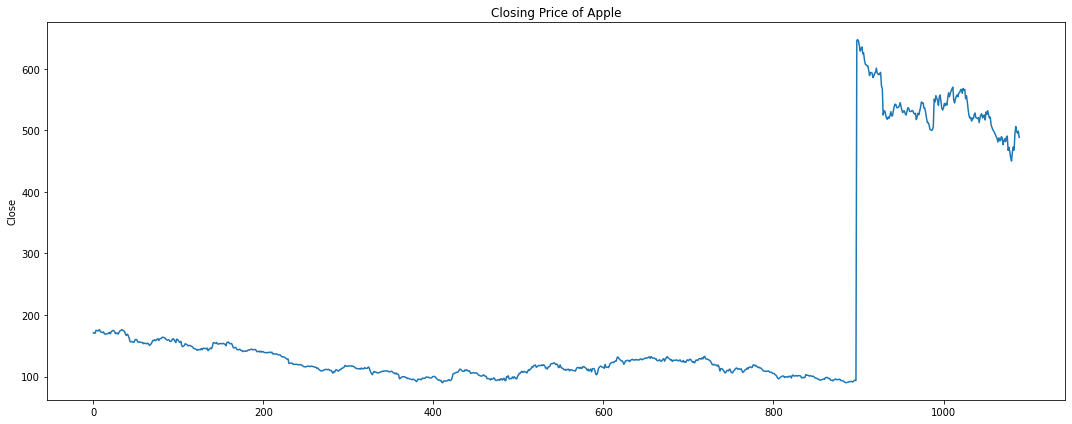

In [ ]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)


df['Close'].plot()
plt.ylabel('Close')
plt.xlabel(None)
plt.title(f"Closing Price of Apple")
    
plt.tight_layout()

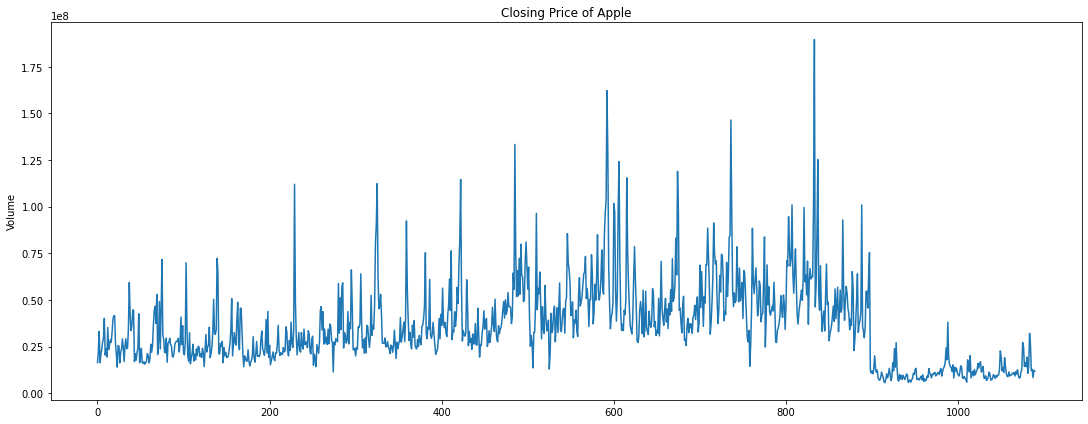

In [ ]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)


df['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Closing Price of Apple")
    
plt.tight_layout()

Text(0.5, 1.0, 'Adj Volume')

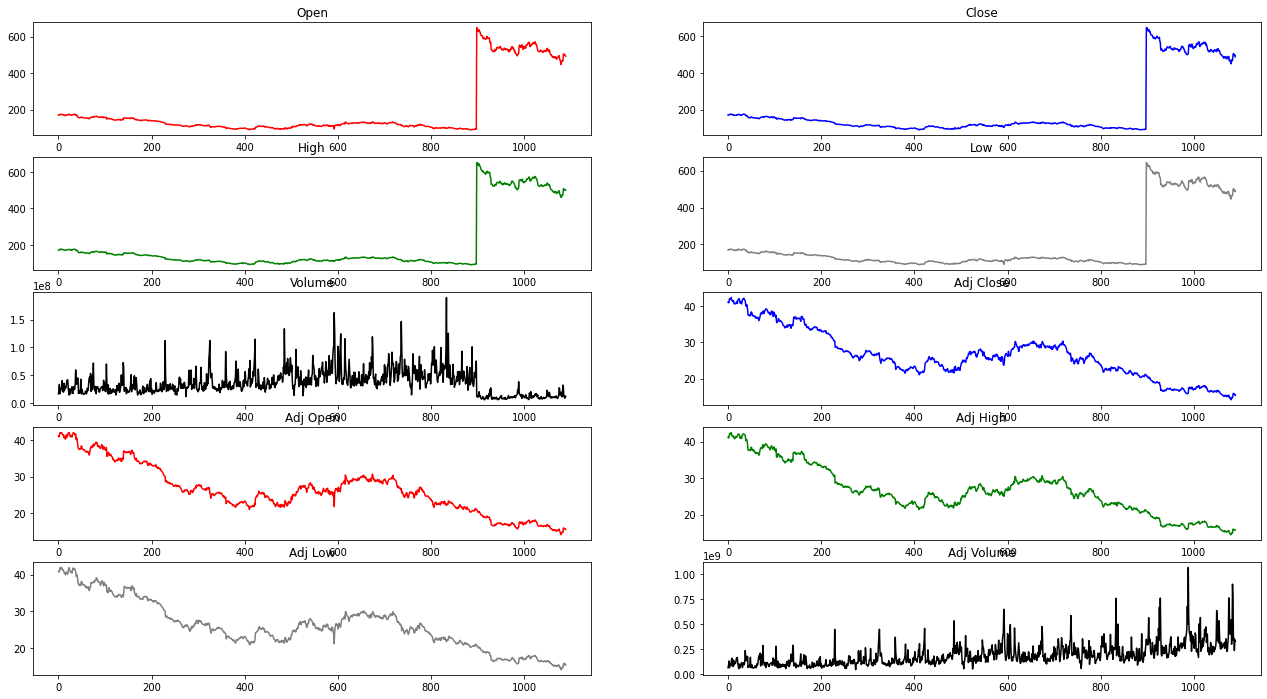

In [ ]:
rcParams['figure.figsize'] = 22, 12

#plt.plot(df.Volume)
#plt.title('Volume')


fig, axs = plt.subplots(5, 2)

axs[0, 0].plot( df.index, df.Open, color = 'red')
#axs[0, 0].xticks(rotation=45)
axs[0, 0].set_title('Open')
    
axs[0, 1].plot( df.index, df.Close, color = 'blue')
axs[0, 1].set_title('Close')
    
axs[1, 0].plot( df.index, df.High, color = 'green')
axs[1, 0].set_title('High')

axs[1, 1].plot( df.index, df.Low, color = 'grey')
axs[1, 1].set_title('Low')


axs[2, 0].plot( df.index, df.Volume, color = 'black')
axs[2, 0].set_title('Volume')

axs[2, 1].plot( df.index, df['Adj_Close'], color = 'blue')
axs[2, 1].set_title('Adj Close')


axs[3, 0].plot( df.index, df.Adj_Open, color = 'red')
axs[3, 0].set_title('Adj Open')

axs[3, 1].plot( df.index, df.Adj_High, color = 'green')
axs[3, 1].set_title('Adj High')

axs[4, 0].plot( df.index, df.Adj_Low, color = 'grey')
axs[4, 0].set_title('Adj Low')

axs[4, 1].plot( df.index, df.Adj_Volume, color = 'black')
axs[4, 1].set_title('Adj Volume')

# Moving average of the various stocks

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
  column_name = f"MA for {ma} days"
  df[column_name] = df['Close'].rolling(ma).mean()

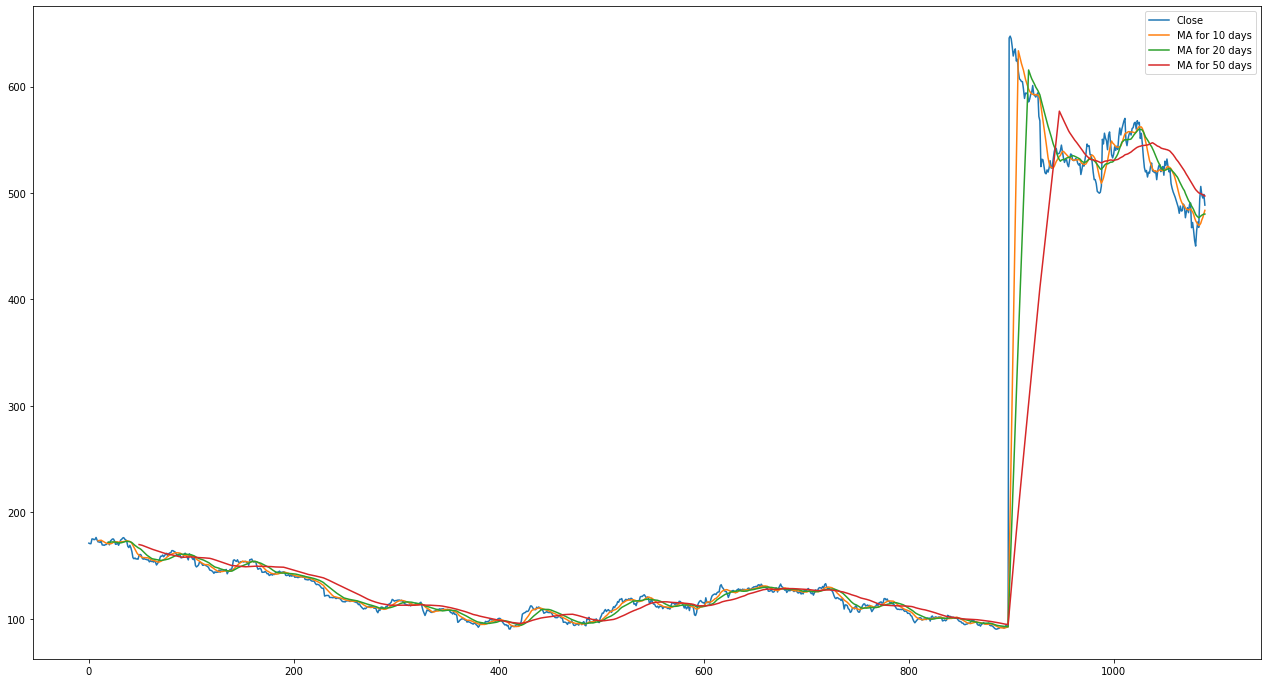

In [ ]:

fig.set_figheight(8)
fig.set_figwidth(15)

df[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()



fig.tight_layout()

# Daily return of the stock on average?

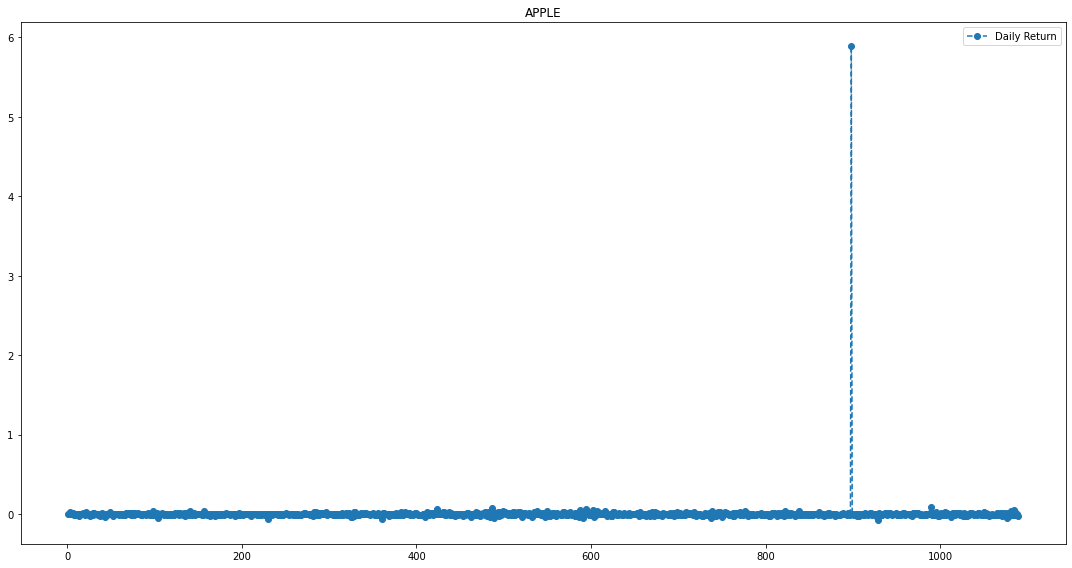

In [ ]:
# We'll use pct_change to find the percent change for each day

df['Daily Return'] = df['Close'].pct_change()

fig, axes = plt.subplots(ncols=1)
fig.set_figheight(8)
fig.set_figwidth(15)

df['Daily Return'].plot( legend=True, linestyle='--', marker='o')
axes.set_title('APPLE')


fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


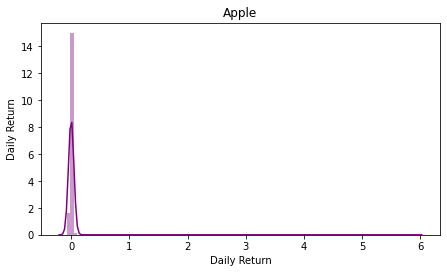

In [ ]:
import seaborn as sns
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))


plt.subplot(2,2, 1)
sns.distplot(df['Daily Return'].dropna(), bins=100, color='purple')
plt.ylabel('Daily Return')
plt.title(f'Apple')


plt.tight_layout()

# Correlation between different stocks closing prices?

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
#closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

AAPL_close_price=df.iloc[:,4]

company_closeprice_list=[ AAPL_close_price]
closing_df = pd.concat(company_closeprice_list, axis=1)

closing_df.columns = ['AAPL']

closing_df.head() 

,AAPL
0,171.08
1,170.60
2,170.57
3,175.01
4,175.01


In [ ]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL
0,NaN
1,-0.002806
2,-0.000176
3,0.026030
4,0.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


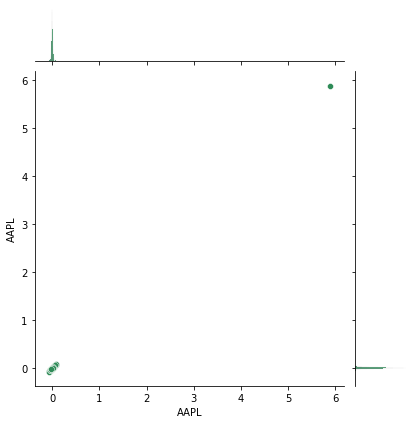

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('AAPL', 'AAPL', tech_rets, kind='scatter', color='seagreen')

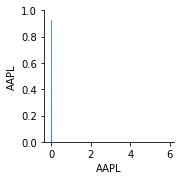

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

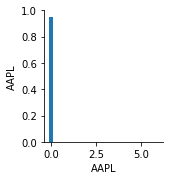

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')


return_fig.map_lower(sns.kdeplot, cmap='cool_d')


return_fig.map_diag(plt.hist, bins=30)

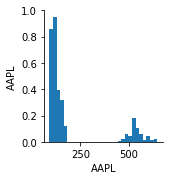

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


# Risk by investing in a particular stock

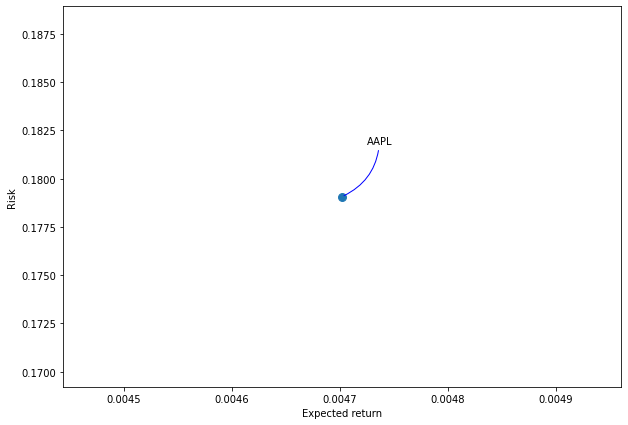

In [ ]:

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Predicting the closing price stock price of APPLE inc

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
0,12/28/2017,171.00,171.850,170.480,171.080,16480187,41.006118,41.209949,40.881421,41.025302,65920748,NaN,NaN,NaN,NaN
1,12/27/2017,170.10,170.780,169.710,170.600,21498213,40.790296,40.953361,40.696773,40.910197,85992852,NaN,NaN,NaN,-0.002806
2,12/26/2017,170.80,171.470,169.679,170.570,33185536,40.958157,41.118825,40.689340,40.903003,132742144,NaN,NaN,NaN,-0.000176
3,12/22/2017,174.68,175.424,174.500,175.010,16349444,41.888589,42.067001,41.845424,41.967723,65397776,NaN,NaN,NaN,0.026030
4,12/21/2017,174.17,176.020,174.100,175.010,20949896,41.766290,42.209923,41.749504,41.967723,83799584,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,9/9/2013,505.00,507.920,503.480,506.170,12167400,15.945715,16.037916,15.897720,15.982659,340687200,471.5940,478.34450,499.42191,0.023310
1086,9/6/2013,498.44,499.380,489.950,498.220,12840200,15.738579,15.768260,15.470501,15.731632,359525600,474.6750,479.10400,498.88649,-0.015706
1087,9/5/2013,500.25,500.680,493.640,495.270,8441700,15.795731,15.809308,15.587016,15.638484,236367600,476.9720,479.69700,498.22869,-0.005921
1088,9/4/2013,499.56,502.240,496.280,498.691,12322600,15.773944,15.858566,15.670375,15.746504,345032800,480.3731,480.15355,497.78983,0.006907


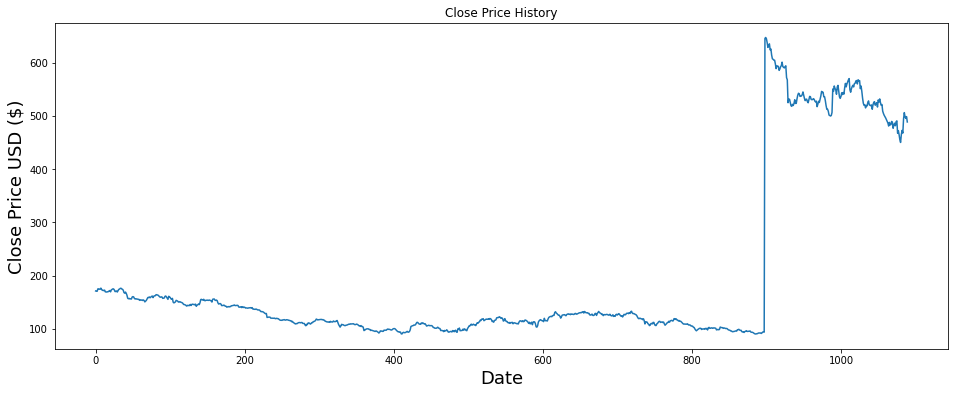

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1036

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.14504461],
       [0.14418296],
       [0.1441291 ],
       ...,
       [0.7270002 ],
       [0.73314126],
       [0.71499093]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.14504461, 0.14418296, 0.1441291 , 0.15209938, 0.15209938,
       0.15091461, 0.15125568, 0.15463048, 0.15023247, 0.14709103,
       0.14718079, 0.14615757, 0.14789883, 0.14197498, 0.14188522,
       0.14132874, 0.14245965, 0.14274687, 0.14499076, 0.14642684,
       0.14217244, 0.14861687, 0.15044788, 0.15202757, 0.15200962,
       0.14874253, 0.14306999, 0.14337516, 0.14508051, 0.1414544 ,
       0.14551134, 0.15023247, 0.15148904, 0.15366112, 0.15430736,
       0.15174036, 0.1507351 , 0.14759366, 0.13971314, 0.13752311,
       0.14138259, 0.13721794, 0.1306299 , 0.1205055 , 0.1187104 ,
       0.11994902, 0.11827957, 0.11842318, 0.1179385 , 0.124724  ,
       0.12599853, 0.12493942, 0.11975156, 0.1179744 , 0.11896171,
       0.11779489, 0.11768718, 0.11671783, 0.11687939, 0.11345073])]
[0.11524583984059453]

[array([0.14504461, 0.14418296, 0.1441291 , 0.15209938, 0.15209938,
       0.15091461, 0.15125568, 0.15463048, 0.15023247, 0.14709103,
       0.14718079, 0.14615757, 0.14

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
31/31 [==============================] - 6s 94ms/step - loss: 0.0180
Epoch 2/50
31/31 [==============================] - 3s 92ms/step - loss: 0.0043
Epoch 3/50
31/31 [==============================] - 3s 91ms/step - loss: 0.0037
Epoch 4/50
31/31 [==============================] - 3s 92ms/step - loss: 0.0033
Epoch 5/50
31/31 [==============================] - 3s 91ms/step - loss: 0.0031
Epoch 6/50
31/31 [==============================] - 3s 92ms/step - loss: 0.0030
Epoch 7/50
31/31 [==============================] - 3s 91ms/step - loss: 0.0026
Epoch 8/50
31/31 [==============================] - 3s 91ms/step - loss: 0.0025
Epoch 9/50
31/31 [==============================] - 3s 92ms/step - loss: 0.0024
Epoch 10/50
31/31 [==============================] - 3s 91ms/step - loss: 0.0022
Epoch 11/50
31/31 [==============================] - 3s 90ms/step - loss: 0.0022
Epoch 12/50
31/31 [==============================] - 3s 90ms/step - loss: 0.0020
Epoch 13/50
31/31 [==================

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

7.8590849794698405

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


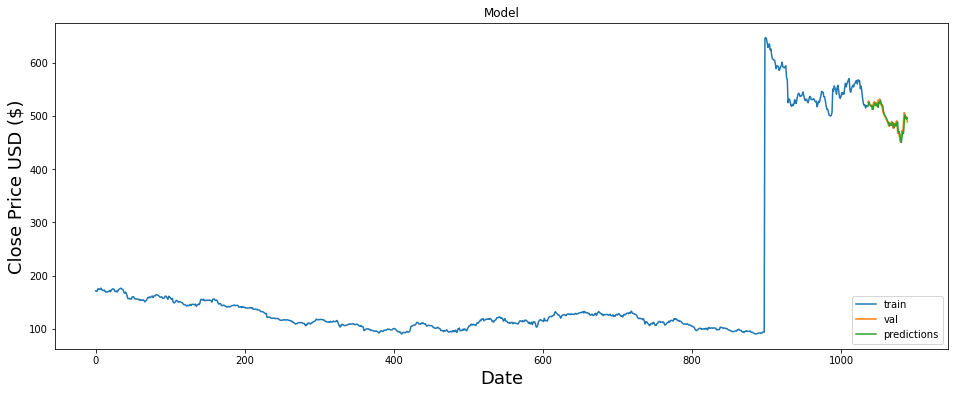

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['train', 'val', 'predictions'], loc='lower right')
plt.show()

In [ ]:
valid[:15]

,Close,predictions
1036,524.991,517.552734
1037,528.160,522.729309
1038,520.634,525.871094
1039,520.010,519.945312
1040,519.048,518.692261
1041,520.560,517.618103
1042,512.492,518.742004
1043,520.920,512.157166
1044,525.449,518.347351
1045,526.750,522.792419
